# Gaussian Mixture Model (GMM)

In [35]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Random State

random_s = 10

In [37]:
# Load Dataset

df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/gaussian-demo-01.csv')
df.head()

,X,Y
0,-0.361035,-0.499299
1,-1.322430,0.200600
2,0.319851,0.085714
3,-1.751356,-0.983921
4,0.135297,0.677857


In [38]:
# Scaled

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[0.09990149, 0.18633039],
       [0.03551493, 0.25867642],
       [0.14550182, 0.24680108],
       [0.00678888, 0.13623682],
       [0.13314183, 0.30800867],
       [0.16655416, 0.25535489],
       [0.17411518, 0.1173968 ],
       [0.24295385, 0.36329127],
       [0.17230153, 0.34484888],
       [0.22403809, 0.24623317],
       [0.04663421, 0.09507054],
       [0.16787328, 0.15826065],
       [0.1519403 , 0.29240592],
       [0.17825714, 0.36039285],
       [0.16868513, 0.27663335],
       [0.09695399, 0.38753619],
       [0.16028209, 0.18448351],
       [0.11725475, 0.1012116 ],
       [0.1775883 , 0.11796215],
       [0.19452274, 0.36701189],
       [0.07551161, 0.18069202],
       [0.14087104, 0.23273171],
       [0.23393896, 0.33309141],
       [0.11539873, 0.33381193],
       [0.16318825, 0.11606166],
       [0.1181789 , 0.18902754],
       [0.14285926, 0.33015108],
       [0.03309843, 0.19377974],
       [0.18310921, 0.297085  ],
       [0.07220051, 0.25870638],
       [0.

In [39]:
# Reconstruct to a dataframe

df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled.tail(3)

,X,Y
297,0.863287,0.185223
298,0.775727,0.136770
299,0.764046,0.276941


# Test for Gaussianity (Normal Distribution)

## Q-Q Plot

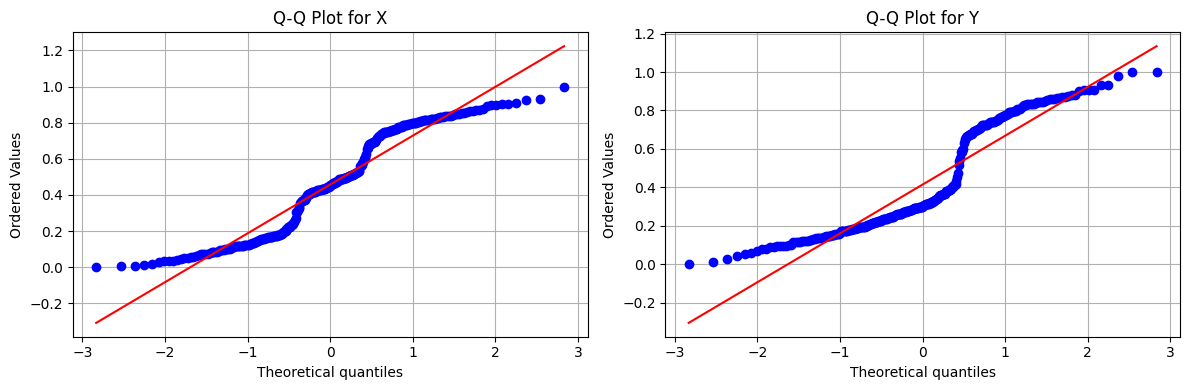

In [40]:
# Test for Gaussianity (Normal Distribution) using Q-Q Plot

import scipy.stats as stats

# Generate Q-Q plots for X and Y

plt.figure(figsize=(12, 4))

for i, feature in enumerate(['X', 'Y'], 1):

  plt.subplot(1, 2, i) # 1 row, 2 columns
  stats.probplot(df_scaled[feature], dist = 'norm', plot = plt)
  plt.grid()
  plt.title(f'Q-Q Plot for {feature}')

plt.tight_layout()
plt.show()

# if it follows the straight line, it is an acceptable Gaussian

## Shapiro - Wilk Test

In [41]:
# Perform Shapiro-Wilk test for normality on both columns

shapiro_test_x = stats.shapiro(df_scaled['X'])
shapiro_test_y = stats.shapiro(df_scaled['Y'])

shapiro_test_x, shapiro_test_y

# if p-value <= 0.05 (Non Gausssian)
# if p-values > 0.05 (Gaussian)

# Since the p-values for both columns are greater than the common significance level (e.g., 0.05),
# This indicates that the data in both columns can be considered normally distributed.

(ShapiroResult(statistic=0.9271591034621901, pvalue=6.112636107137912e-11),
 ShapiroResult(statistic=0.8785119807700534, pvalue=1.1094299588915109e-14))

## Kolmogorov-Smirnov Test

In [42]:
# Perform the Kolmogorov-Smirnov test for normality on both columns

ks_test_x = stats.kstest(df_scaled['X'], 'norm', args=(df['X'].mean(), df_scaled['X'].std()))
ks_test_y = stats.kstest(df_scaled['Y'], 'norm', args=(df['Y'].mean(), df_scaled['Y'].std()))

ks_test_x, ks_test_y

# Since the p-values for both columns are greater than the common significance level (e.g., 0.05),
# This indicates that the data in both columns can be considered normally distributed.

(KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1.0, statistic_sign=1),
 KstestResult(statistic=0.9957375336209316, pvalue=0.0, statistic_location=1.0, statistic_sign=1))

## Skewness Test

In [43]:
# Calculate skewness for both columns

skewness_x = stats.skew(df_scaled['X'])
skewness_y = stats.skew(df_scaled['Y'])

skewness_x, skewness_y

# A skewness value between -1 and +1 is excellent, while -2 to +2 is generally acceptable.
# Values beyond -2 and +2 suggest substantial nonnormality (Hair et al., 2022, p. 66).

(0.038607843653730774, 0.5846830230331511)

## Kurtosis

In [44]:
# Calculate kurtosis for both columns

kurtosis_x = stats.kurtosis(df_scaled['X'])
kurtosis_y = stats.kurtosis(df_scaled['Y'])

kurtosis_x, kurtosis_y

# Both values are very close to zero, indicating that the distributions of both columns exhibit near-normal kurtosis,
# meaning they have tails similar to a normal distribution.

# The values for asymmetry and kurtosis between -2 and +2 are considered
# acceptable in order to prove normal univariate distribution (George & Mallery, 2010).

(-1.3463113479710076, -1.1460783447977836)

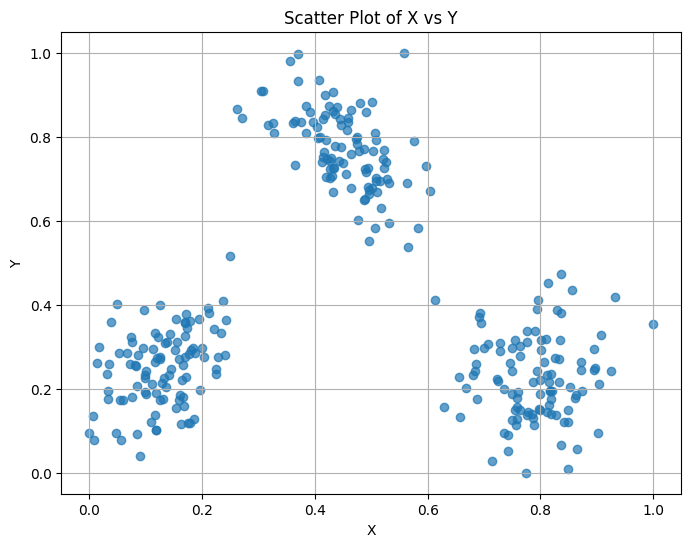

In [45]:
# Visualize the Data

# Create a scatter plot of the original data (X vs Y)

plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['X'], df_scaled['Y'], alpha=0.7)
plt.title('Scatter Plot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

# GMM Modeling

In [46]:
# Fit GMM models for a range of cluster counts and compute BIC and AIC

from sklearn.mixture import GaussianMixture

n_clusters_range = range(1, 11)  # Try 1 to 10 clusters

bic_scores = []
aic_scores = []

for n_clusters in n_clusters_range:

    gmm = GaussianMixture(n_components = n_clusters, random_state = random_s)
    gmm.fit(df_scaled)
    bic_scores.append(gmm.bic(df_scaled))
    aic_scores.append(gmm.aic(df_scaled))

# Return the BIC and AIC scores for each number of clusters

bic_scores, aic_scores

# BIC SCORE:
# The Bayesian Information Criterion (BIC) is a statistical criterion used for model selection,
# helping you to compare different models and choose the one that best fits the data while
# balancing model complexity. The BIC score considers both how well the model fits the data and
# the number of parameters in the model, penalizing models that are too complex.

# Interpreting the BIC Score
# Lower BIC values indicate better models, but it's important to compare BIC scores across models.
# A smaller BIC suggests a better model, as it either fits the data better or has fewer parameters.

# The optimal number of clusters is where the BIC score is the lowest,
# balancing goodness of fit with model complexity.

# AIC SCORE:
# The Akaike Information Criterion (AIC) is a measure used to evaluate how well a statistical model fits a dataset while
# considering the complexity of the model. In the context of Gaussian Mixture Models (GMM),
# the AIC score helps you decide how many clusters (Gaussian components) you should use to model your data.

([173.57428155549525,
  -420.413124657564,
  -631.9134262098794,
  -599.526695040888,
  -571.0826133230582,
  -540.0259845053683,
  -514.2037910354046,
  -494.5362594183451,
  -454.1755002260723,
  -427.01951530061075],
 [155.05536918221424,
  -461.15473187878223,
  -694.8777282790348,
  -684.7136919579806,
  -678.4923050880881,
  -669.6583711183354,
  -666.0588724963088,
  -668.6140357271865,
  -650.475971382851,
  -645.5426813053266])

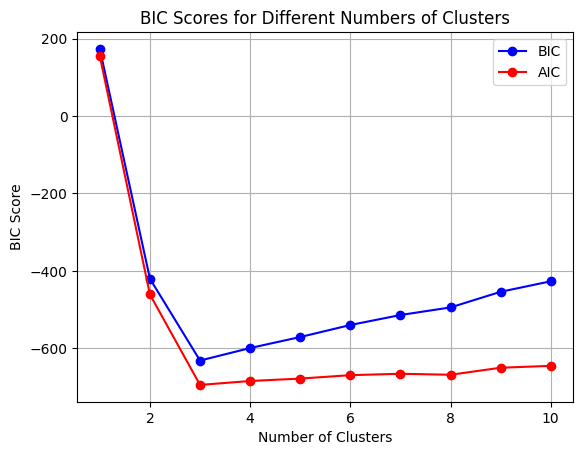

In [47]:
# Visualized the Scores
# Plot BIC scores to find the optimal number of clusters

plt.plot(n_clusters_range, bic_scores, marker='o', color = 'blue', label = 'BIC')
plt.plot(n_clusters_range, aic_scores, marker='o', color = 'red', label = 'AIC')
plt.title('BIC Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.grid(True)
plt.legend()
plt.show()

In [48]:
# Calculate silhouette scores for GMM models with 2, 3, 4, and 5 clusters

from sklearn.metrics import silhouette_score

silhouette_scores = {}

for n_clusters in [2, 3, 4, 5, 6, 7, 8]:

    # Fit GMM with n_clusters
    gmm = GaussianMixture(n_components = n_clusters, random_state = random_s)
    labels = gmm.fit_predict(df_scaled)

    # Calculate the silhouette score
    score = silhouette_score(df_scaled, labels)
    silhouette_scores[n_clusters] = score

silhouette_scores

# Silhouette Score is more intuitive and often reliable for clusters that are spherical,
# evenly distributed, and not too dense or sparse.

{2: 0.5166376323763124,
 3: 0.7588261198631621,
 4: 0.6283788538924137,
 5: 0.49757180945595925,
 6: 0.49746213439570397,
 7: 0.4016981450038838,
 8: 0.2771058429589371}

In [49]:
# Using Davies-Bouldin Score

from sklearn.metrics import davies_bouldin_score

# Try GMM with different numbers of clusters and calculate DBI

dbi_scores = []
n_clusters_range = [2, 3, 4, 5, 6]

for n in n_clusters_range:

    gmm = GaussianMixture(n_components = n, random_state = random_s)
    labels = gmm.fit_predict(df_scaled)
    score = davies_bouldin_score(df_scaled, labels)
    dbi_scores.append(score)
    print(f"Number of Clusters: {n}, DBI: {score}")

# Find the number of clusters with the lowest DBI
best_n_clusters_dbi = n_clusters_range[np.argmin(dbi_scores)]
print(f"\nBest number of clusters according to DBI: {best_n_clusters_dbi}")

# Davies-Bouldin Score can be more appropriate when clusters are not spherical or when they have varying densities.
# It can handle more irregular shapes and still produce a meaningful evaluation.

Number of Clusters: 2, DBI: 0.7712235600943638
Number of Clusters: 3, DBI: 0.32509513741592466
Number of Clusters: 4, DBI: 0.6204615482004177
Number of Clusters: 5, DBI: 0.8478620364142463
Number of Clusters: 6, DBI: 0.8133307804968344

Best number of clusters according to DBI: 3


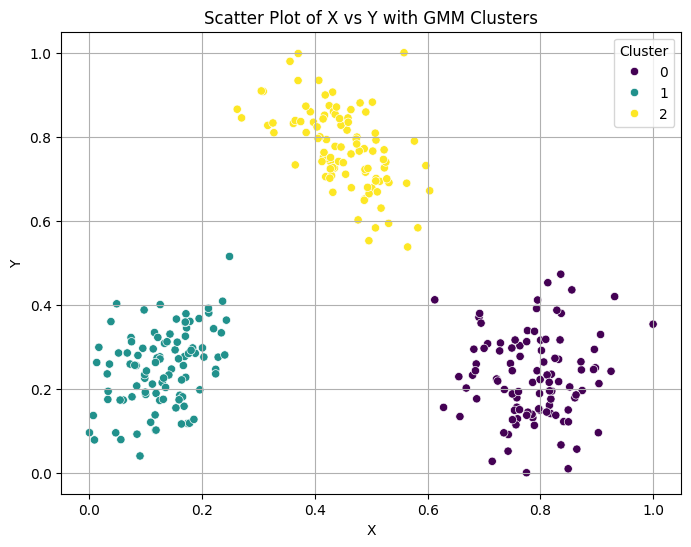

In [50]:
# Apply GMM with n components

gmm = GaussianMixture(n_components = 3, random_state = random_s)
gmm.fit(df_scaled)

# Predict the cluster labels
df_scaled['Cluster'] = pd.DataFrame(gmm.predict(df_scaled))
# df_scaled['Cluster'] = df_scaled['Cluster'].apply(lambda x: f'Cluster {x}')

# Plot the scatter plot with GMM clusters
plt.figure(figsize = (8, 6))

sns.scatterplot(x = df_scaled['X'], y = df_scaled['Y'], data = df_scaled, palette = 'viridis', hue = 'Cluster')

plt.title('Scatter Plot of X vs Y with GMM Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

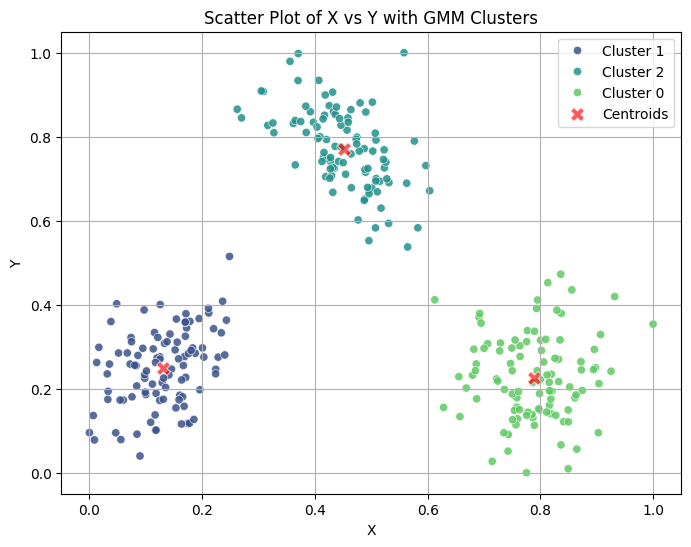

In [51]:
# Get the GMM centroids (means of the Gaussian components)

centroids = gmm.means_
centroids

df_scaled['Cluster'] = df_scaled['Cluster'].apply(lambda x: f'Cluster {x}')

# Plot the scatter plot with GMM clusters
plt.figure(figsize = (8, 6))

sns.scatterplot(x = df_scaled['X'], y = df_scaled['Y'], data = df_scaled, hue = 'Cluster', palette = 'viridis', alpha = 0.85)
sns.scatterplot(x = centroids[:, 0], y = centroids[:, 1], c = 'red', marker = 'X', s = 100, label = 'Centroids', alpha = 0.65)

plt.title('Scatter Plot of X vs Y with GMM Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()